# Project: Portfolio - Final Project

**Instructions for Students:**

Please carefully follow these steps to complete and submit your assignment:

1. **Completing the Assignment**: You are required to work on and complete all tasks in the provided assignment. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: If you don't previously have a folder for collecting assignments, you must create a new folder in your Google Drive. This will be a repository for all your completed assignment files, helping you keep your work organized and easy to access.
   
3. **Uploading Completed Assignment**: Upon completion of your assignment, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your assignment Google Drive folder. This is crucial for the submission and evaluation of your assignment.
   
5. **Setting Permission toPublic**: Please make sure your **Google Drive folder is set to public**. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth assignment process for you and the reviewers.

**Description:**

Welcome to your final portfolio project assignment for AI Bootcamp. This is your chance to put all the skills and knowledge you've learned throughout the bootcamp into action by creating real-world AI application.

You have the freedom to create any application or model, be it text-based or image-based or even voice-based or multimodal.

To get you started, here are some ideas:

1. **Sentiment Analysis Application:** Develop an application that can determine sentiment (positive, negative, neutral) from text data like reviews or social media posts. You can use Natural Language Processing (NLP) libraries like NLTK or TextBlob, or more advanced pre-trained models from transformers library by Hugging Face, for your sentiment analysis model.

2. **Chatbot:** Design a chatbot serving a specific purpose such as customer service for a certain industry, a personal fitness coach, or a study helper. Libraries like ChatterBot or Dialogflow can assist in designing conversational agents.

3. **Predictive Text Application:** Develop a model that suggests the next word or sentence similar to predictive text on smartphone keyboards. You could use the transformers library by Hugging Face, which includes pre-trained models like GPT-2.

4. **Image Classification Application:** Create a model to distinguish between different types of flowers or fruits. For this type of image classification task, pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be utilized.

5. **News Article Classifier:** Develop a text classification model that categorizes news articles into predefined categories. NLTK, SpaCy, and sklearn are valuable libraries for text pre-processing, feature extraction, and building classification models.

6. **Recommendation System:** Create a simplified recommendation system. For instance, a book or movie recommender based on user preferences. Python's Surprise library can assist in building effective recommendation systems.

7. **Plant Disease Detection:** Develop a model to identify diseases in plants using leaf images. This project requires a good understanding of convolutional neural networks (CNNs) and image processing. PyTorch, TensorFlow, and OpenCV are all great tools to use.

8. **Facial Expression Recognition:** Develop a model to classify human facial expressions. This involves complex feature extraction and classification algorithms. You might want to leverage deep learning libraries like TensorFlow or PyTorch, along with OpenCV for processing facial images.

9. **Chest X-Ray Interpretation:** Develop a model to detect abnormalities in chest X-ray images. This task may require understanding of specific features in such images. Again, TensorFlow and PyTorch for deep learning, and libraries like SciKit-Image or PIL for image processing, could be of use.

10. **Food Classification:** Develop a model to classify a variety of foods such as local Indonesian food. Pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be a good starting point.

11. **Traffic Sign Recognition:** Design a model to recognize different traffic signs. This project has real-world applicability in self-driving car technology. Once more, you might utilize PyTorch or TensorFlow for the deep learning aspect, and OpenCV for image processing tasks.

**Submission:**

Please upload both your model and application to Huggingface or your own Github account for submission.

**Presentation:**

You are required to create a presentation to showcase your project, including the following details:

- The objective of your model.
- A comprehensive description of your model.
- The specific metrics used to measure your model's effectiveness.
- A brief overview of the dataset used, including its source, pre-processing steps, and any insights.
- An explanation of the methodology used in developing the model.
- A discussion on challenges faced, how they were handled, and your learnings from those.
- Suggestions for potential future improvements to the model.
- A functioning link to a demo of your model in action.

**Grading:**

Submissions will be manually graded, with a select few given the opportunity to present their projects in front of a panel of judges. This will provide valuable feedback, further enhancing your project and expanding your knowledge base.

Remember, consistent practice is the key to mastering these concepts. Apply your knowledge, ask questions when in doubt, and above all, enjoy the process. Best of luck to you all!


In [1]:
# @title #### Student Identity
student_id = "REAENG1GIANM" # @param {type:"string"}
name = "Harris Kristanto" # @param {type:"string"}
drive_link = "https://colab.research.google.com/drive/1-st50t7r9mUUd7VMxkvpBmOr7qIpkFlE?usp=sharing"  # @param {type:"string"}
assignment_id = "00_portfolio_project"

## Installation and Import `rggrader` Package

In [2]:
%pip install rggrader
from rggrader import submit_image
from rggrader import submit

Note: you may need to restart the kernel to use updated packages.


## Working Space

In [3]:
# Write your code here
# Feel free to add new code block as needed

!pip install scikit-learn pandas torch torchvision kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumn2u/garbage-classification-v2")

print("Path to dataset files:", path)

Path to dataset files: /home/harriskt17/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/8


In [ ]:
import numpy as np
from PIL import Image
from pathlib import Path
from label_mapping import index_to_label, label_to_index

dataset = {
    'image': [],
    'label': [],
}

dataset_directory = Path(f'{path}/garbage-dataset/')

target_size = (128, 128)

image_count = 0
for dir_path in dataset_directory.rglob('*'):
    if dir_path.is_file():
        try:
            img = Image.open(dir_path).convert('RGB')
            img = img.resize(target_size)
            img_array = np.asarray(img)
            dataset['image'].append(img_array)
            dataset['label'].append(label_to_index[dir_path.parent.name])
            image_count += 1
            if image_count % 1000 == 0:
                print(f"Processed {image_count} images...")
        except Exception as e:
            print(f"Error processing {dir_path}: {e}")

print(f"Finished processing {image_count} images.")

Processed 1000 images...
Processed 2000 images...
Processed 3000 images...
Processed 4000 images...
Processed 5000 images...
Processed 6000 images...
Processed 7000 images...
Processed 8000 images...
Processed 9000 images...
Processed 10000 images...
Processed 11000 images...
Processed 12000 images...
Processed 13000 images...
Processed 14000 images...
Processed 15000 images...
Processed 16000 images...
Processed 17000 images...
Processed 18000 images...
Processed 19000 images...
Finished processing 19762 images.


In [6]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(dataset['image'], dataset['label'], test_size=0.2, random_state=42, stratify=dataset['label'])

train_dataset = {
    'image': train_images,
    'label': train_labels,
}

test_dataset = {
    'image': test_images,
    'label': test_labels,
}

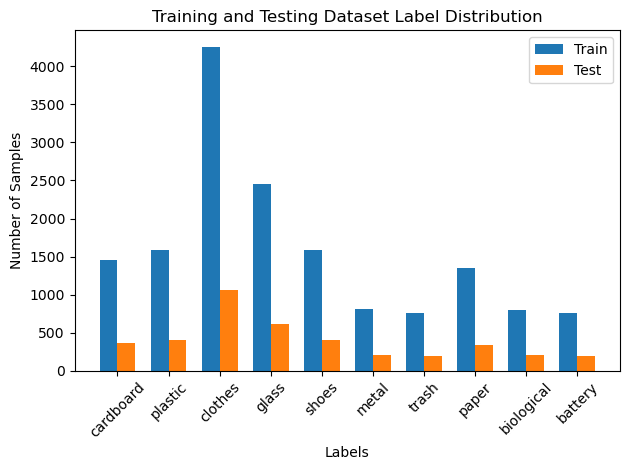

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

train_counter = Counter(train_dataset['label'])
test_counter = Counter(test_dataset['label'])

train_label_counts = [train_counter[i] for i in range(len(labels_list))]
test_label_counts = [test_counter[i] for i in range(len(labels_list))]

x = np.arange(len(labels_list))
width = 0.35
plt.bar(x - width/2, train_label_counts, width, label='Train')
plt.bar(x + width/2, test_label_counts, width, label='Test')
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Training and Testing Dataset Label Distribution')
plt.xticks(x, labels_list, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

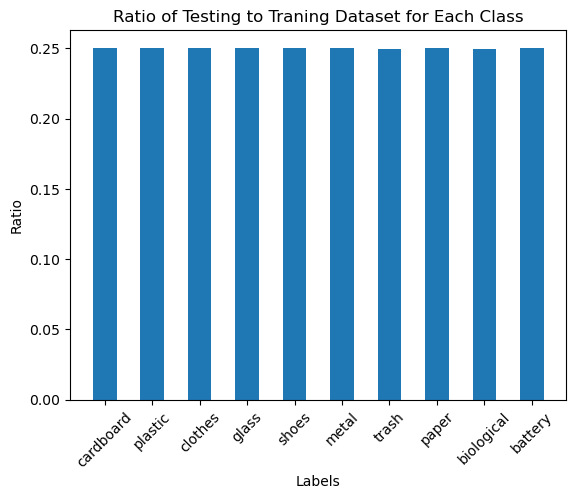

In [ ]:
ratio = [float(test_label_counts[i] / train_label_counts[i]) for i in range(len(index_to_label))]
x = np.arange(len(index_to_label))
plt.bar(x, ratio, 0.5, label='Testing : Training Dataset')
plt.xlabel('Labels')
plt.ylabel('Ratio')
plt.title('Ratio of Testing to Traning Dataset for Each Class')
plt.xticks(x, index_to_label, rotation=45)
plt.show()

In [9]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from dataset_class import WasteDataset
from transforms import transform, target_transform

train_data = WasteDataset(train_dataset, transform=transform['train'], target_transform=target_transform)
test_data = WasteDataset(test_dataset, transform=transform['test'], target_transform=target_transform)

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [10]:
for batch_image, batch_label in train_dataloader:
    print(batch_image)
    print(batch_label)
    break

tensor([[[[ 0.4199,  0.6315,  0.7650,  ..., -1.5613, -1.5581, -1.5016],
          [ 0.4557,  0.7698,  0.8725,  ..., -1.5812, -1.4416, -1.6012],
          [ 0.7199,  1.1866,  0.7868,  ..., -1.3300, -1.7009, -1.7009],
          ...,
          [ 0.7800,  0.6949,  0.7079,  ...,  0.6090,  1.0766,  0.1473],
          [ 0.7768,  0.7102,  0.7697,  ...,  1.0056,  1.0075,  0.8958],
          [ 0.8107,  0.7259,  0.7976,  ...,  0.8002,  1.0952,  1.2398]],

         [[ 1.1646,  1.3512,  1.3975,  ..., -1.4666, -1.4391, -1.3685],
          [ 1.1110,  1.3840,  1.4291,  ..., -1.4811, -1.3384, -1.4956],
          [ 1.2310,  1.7021,  1.2335,  ..., -1.2242, -1.6094, -1.6094],
          ...,
          [ 1.1235,  1.0242,  1.0369,  ...,  0.9264,  1.4297,  0.4737],
          [ 1.0960,  1.0521,  1.0942,  ...,  1.3676,  1.4012,  1.2870],
          [ 1.1247,  1.0375,  1.1227,  ...,  1.1506,  1.4840,  1.6253]],

         [[ 0.4077,  0.6551,  0.8368,  ..., -1.2379, -1.2351, -1.1718],
          [ 0.4899,  0.8357,  

/home/harriskt17/anaconda3/envs/data_science/lib/python3.11/site-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [11]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(labels_list))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
loss_per_epoch = []
model.train()
for i in range(num_epochs):
    loss_sum = 0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        optimizer.zero_grad()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()

    avg_loss = loss_sum/len(train_dataloader)
    print(f'Epoch [{i+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    loss_per_epoch.append(avg_loss)

Epoch [1/20], Loss: 0.8389
Epoch [2/20], Loss: 0.5532
Epoch [3/20], Loss: 0.4647
Epoch [4/20], Loss: 0.4032
Epoch [5/20], Loss: 0.3474
Epoch [6/20], Loss: 0.3012
Epoch [7/20], Loss: 0.2661
Epoch [8/20], Loss: 0.2302
Epoch [9/20], Loss: 0.2234
Epoch [10/20], Loss: 0.1815
Epoch [11/20], Loss: 0.1595
Epoch [12/20], Loss: 0.1512
Epoch [13/20], Loss: 0.1570
Epoch [14/20], Loss: 0.1352
Epoch [15/20], Loss: 0.1188
Epoch [16/20], Loss: 0.1203
Epoch [17/20], Loss: 0.0939
Epoch [18/20], Loss: 0.0958
Epoch [19/20], Loss: 0.1023
Epoch [20/20], Loss: 0.0831


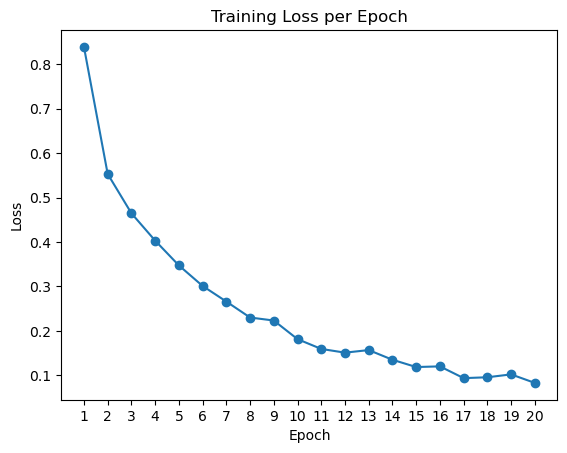

In [12]:
x = np.arange(num_epochs)
width = 0.5
plt.plot(x, loss_per_epoch, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(x, [str(i+1) for i in range(num_epochs)])
plt.title('Training Loss per Epoch')
plt.show()

In [ ]:
model.eval()
correct = 0
total = 0

tp_class = list(0. for _ in range(len(index_to_label)))
tn_class = list(0. for _ in range(len(index_to_label)))
fp_class = list(0. for _ in range(len(index_to_label)))
fn_class = list(0. for _ in range(len(index_to_label)))

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += torch.sum(preds == labels).item()
        for i in range(len(labels)):
            label = labels[i]
            if preds[i] == label:
                tp_class[label] += 1
                for j in range(len(index_to_label)):
                    if j != label:
                        tn_class[j] += 1
            else:
                fp_class[preds[i]] += 1
                fn_class[label] += 1

accuracy = float('{:.4f}'.format(correct / total))
print(f'Model accuracy: {accuracy}')

precision = []
recall = []
f1_score = []
class_accuracy = []
for i in range(len(index_to_label)):
    precision.append(tp_class[i] / (tp_class[i] + fp_class[i]) if (tp_class[i] + fp_class[i]) > 0 else 0)
    recall.append(tp_class[i] / (tp_class[i] + fn_class[i]) if (tp_class[i] + fn_class[i]) > 0 else 0)
    f1_score.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0)
    class_accuracy.append((tp_class[i] + tn_class[i]) / total if total > 0 else 0)

Model accuracy: 0.8824


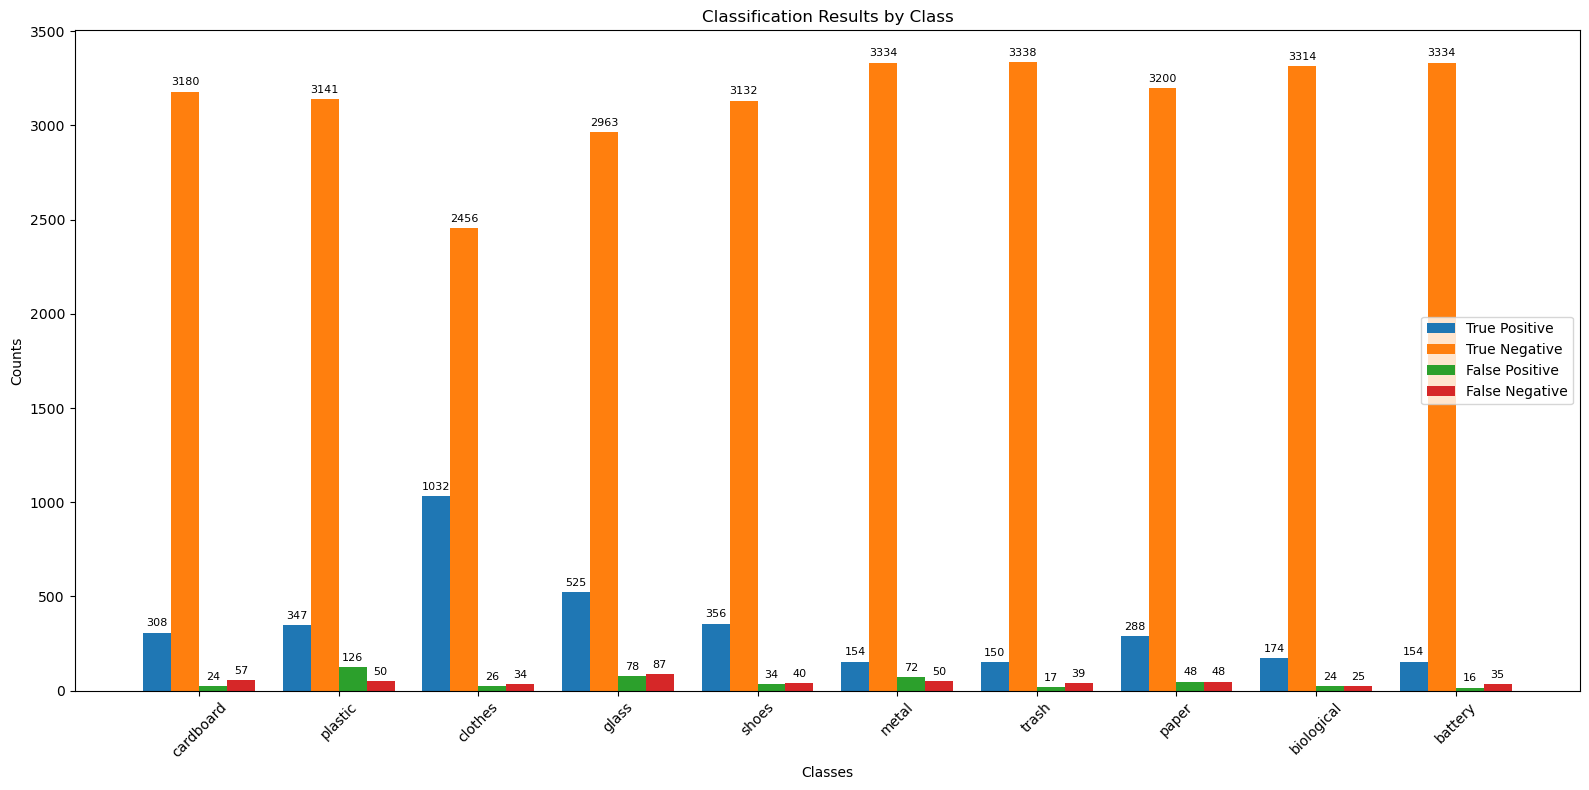

In [ ]:
plt.figure(figsize=(16, 8))
x = np.arange(len(index_to_label))
width = 0.2

bars_tp = plt.bar(x - 1.5*width, tp_class, width, label='True Positive')
plt.bar_label(bars_tp, padding=3, fontsize=8)

bars_tn = plt.bar(x - 0.5*width, tn_class, width, label='True Negative')
plt.bar_label(bars_tn, padding=3, fontsize=8)

bars_fp = plt.bar(x + 0.5*width, fp_class, width, label='False Positive')
plt.bar_label(bars_fp, padding=3, fontsize=8)

bars_fn = plt.bar(x + 1.5*width, fn_class, width, label='False Negative')
plt.bar_label(bars_fn, padding=3, fontsize=8)

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Classification Results by Class')
plt.xticks(x, [index_to_label[i] for i in range(len(index_to_label))], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

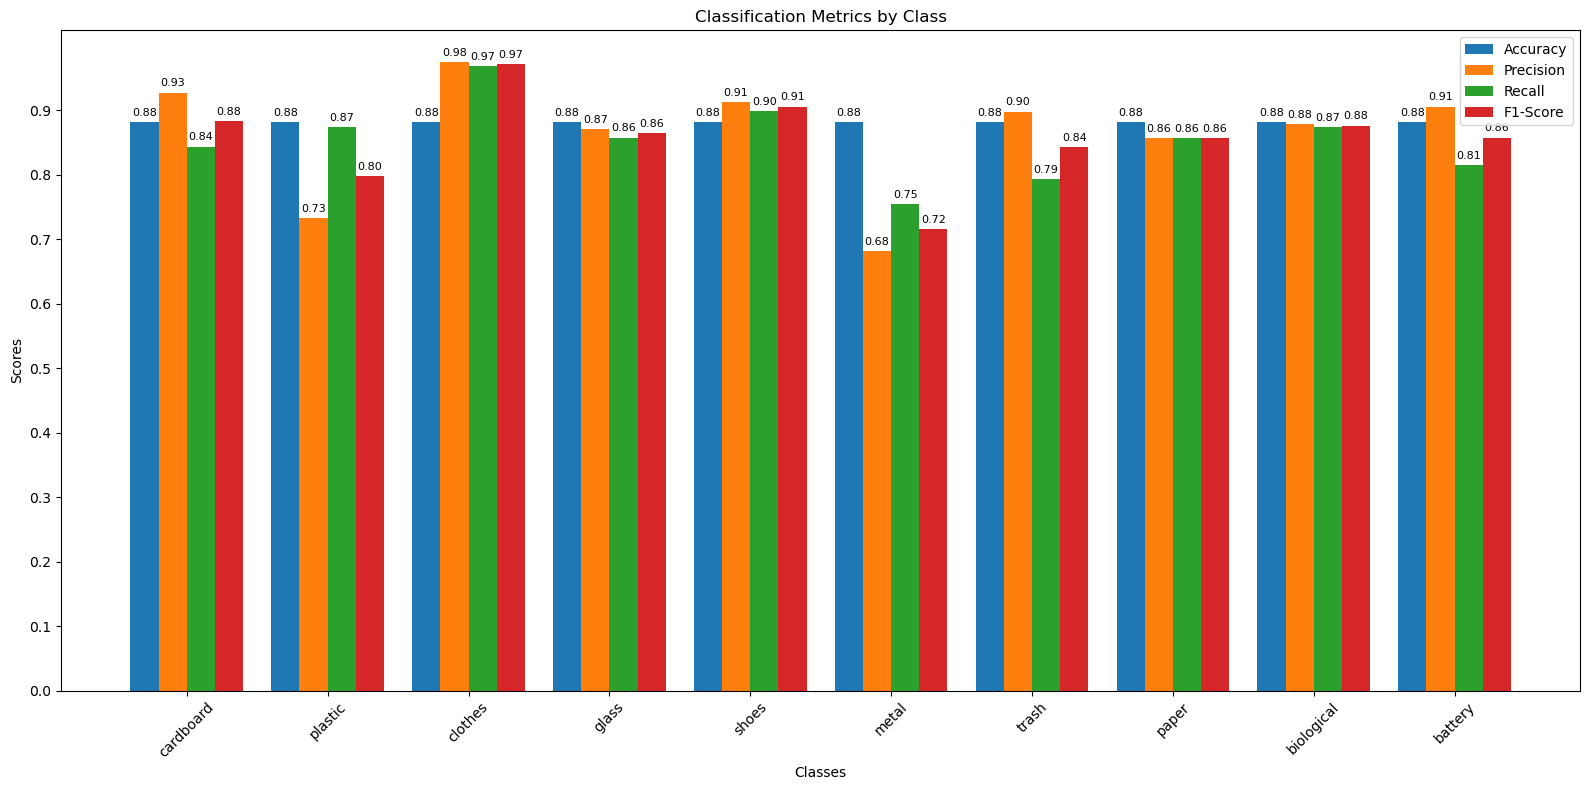

In [ ]:
plt.figure(figsize=(16, 8))
x = np.arange(len(index_to_label))
width = 0.2

bars_acc = plt.bar(x - 1.5*width, class_accuracy, width, label='Accuracy')
plt.bar_label(bars_acc, fmt='%.2f', padding=3, fontsize=8)

bars_prec = plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar_label(bars_prec, fmt='%.2f', padding=3, fontsize=8)

bars_rec = plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar_label(bars_rec, fmt='%.2f', padding=3, fontsize=8)

bars_f1 = plt.bar(x + 1.5*width, f1_score, width, label='F1-Score')
plt.bar_label(bars_f1, fmt='%.2f', padding=3, fontsize=8)

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Metrics by Class')
plt.xticks(x, [index_to_label[i] for i in range(len(index_to_label))], rotation=45)
plt.yticks(np.arange(0, 1, step=0.1))
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
from PIL import Image
from io import BytesIO
from google import genai
from google.genai import types
from dotenv import load_dotenv
import requests
import torch.nn.functional as F
import os

load_dotenv()

def predict_image(img: Image):
    img_tensor = transform['test'](img).unsqueeze(0)
    img_tensor = img_tensor.to(device)
    output = model(img_tensor)
    softmax = F.softmax(output, dim=1)
    _, preds = torch.max(output, dim=1)
    predicted_label = index_to_label[preds.item()]
    confidence_score = float('{:.4f}'.format(softmax[0][preds.item()].item()))

    client = genai.Client(api_key=os.getenv('GOOGLE_API_KEY'))

    if predicted_label != 'trash':
        response = client.models.generate_content(
            model="gemini-2.5-flash",
            contents=f"Mention 5 ways of how to manage {predicted_label} waste consicely!",
        )
    else:
        buffer = BytesIO()
        img.save(buffer, format="PNG")
        image_bytes = buffer.getvalue()
        response = client.models.generate_content(
            model="gemini-2.5-flash",
            contents=["Mention 5 ways of how to manage this waste concisely!", types.Part.from_bytes(data=image_bytes, mime_type="image/png")],
        )

    return predicted_label, confidence_score, response.text

img_url = 'https://trynada.com/cdn/shop/articles/1_IVWq-qFw4cY0uJjSHIoxdg.webp?v=1682861209'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content)).convert('RGB')
result = predict_image(img)
print(result)

('trash', 0.9547, 'Here are 5 ways to manage used toothbrushes:\n\n1.  **Switch to Eco-Friendly Options:** Opt for toothbrushes made from sustainable materials like bamboo (compostable handle) or those with replaceable heads to reduce plastic waste.\n2.  **Repurpose for Cleaning:** Use old toothbrushes for household chores like scrubbing grout, cleaning hard-to-reach areas, jewelry, or small items.\n3.  **Participate in Specialized Recycling Programs:** Look for dedicated recycling schemes, such as TerraCycle programs or brand-specific take-back initiatives, that can process mixed-material toothbrushes.\n4.  **Disassemble & Separate (if possible):** For some toothbrushes, you might be able to remove the bristles (which are often not recyclable) from a plastic handle that *could* be recycled if the local facility accepts that type of plastic.\n5.  **Minimize and Dispose Responsibly:** If no other options are available, dispose of them in general waste, but prioritize reducing their use 

In [17]:
import gradio as gr

demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Label(num_top_classes=1, label="Predicted Label"),
        gr.Number(label="Confidence Score"),
        gr.Markdown(label="Waste Management Suggestions", show_label=True, container=True),
    ],
    title="Waste Classification and Management Suggestion",
    description="Upload an image of garbage to classify its type and get suggestions on how to manage it.",
)

demo.launch(share=True, inline=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://cf98a45ecccf666e51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [18]:
torch.save(model.state_dict(), 'model.pth')

## Submit Notebook

In [19]:
# portfolio_link = ""
# presentation_link = ""

# question_id = "01_portfolio_link"
# submit(student_id, name, assignment_id, str(portfolio_link), question_id, drive_link)

# question_id = "02_presentation_link"
# submit(student_id, name, assignment_id, str(presentation_link), question_id, drive_link)

# FIN